In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv(r'C:\Users\HP\Desktop\data setys for analysis\SampleSuperstore (1).csv')

In [3]:
df.head(3)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,0.0,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.62,2,0.0,6.8714


In [4]:
df.shape

(9994, 13)

In [5]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [6]:
df.drop_duplicates(inplace=True)
print(df.shape)

(9977, 13)


In [7]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


###  we see which feature are more related to the point

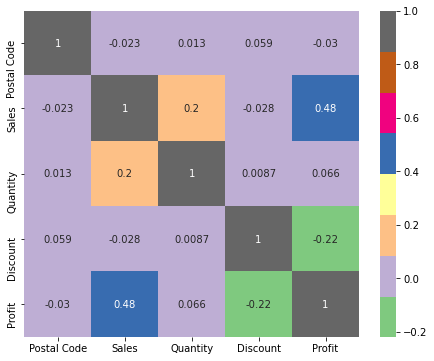

In [8]:
correla=df.corr()
plt.figure(figsize=(7.5,6))
sns.heatmap(correla, annot=True, cmap='Accent')

# visualization of data 

In [9]:
df.head(2)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,0.0,219.5820


In [10]:
df['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

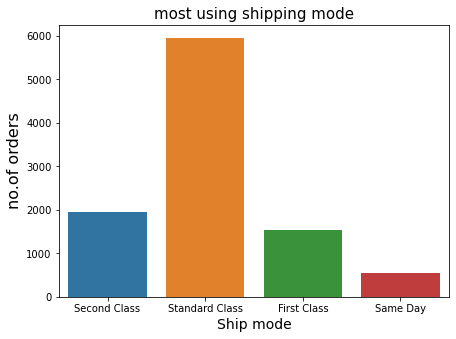

In [11]:
plt.figure(figsize=(7,5))
plt.title('most using shipping mode', size=15)
sns.countplot(df['Ship Mode'])

plt.xlabel('Ship mode', size=14)
plt.ylabel('no.of orders', size=16)
plt.show()

# we see the standard class shipping mode is used the mode

In [12]:
df.head(1)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136


# Regions with highest sales

In [13]:
df.Region.value_counts()

West       3193
East       2845
Central    2319
South      1620
Name: Region, dtype: int64

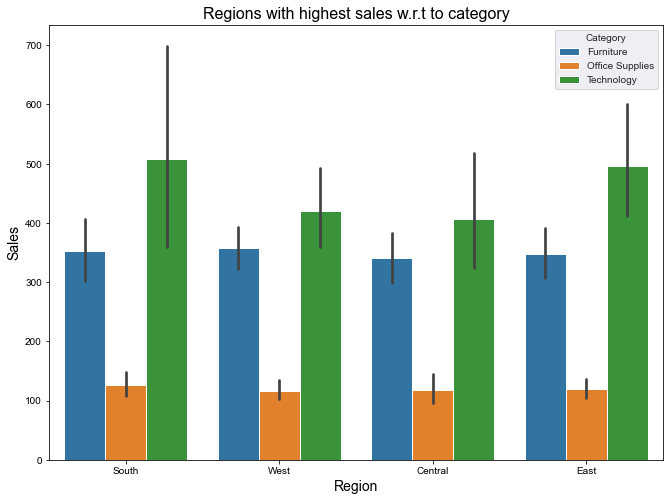

In [14]:
plt.figure(figsize=(11,8))
plt.title("Regions with highest sales w.r.t to category", size=16)

plt.xlabel('Rgions' , size=14)
plt.ylabel('Sales', size=14)
sns.set_style('darkgrid')

sns.barplot(df['Region'], df['Sales'], hue=df['Category'] )
plt.show()

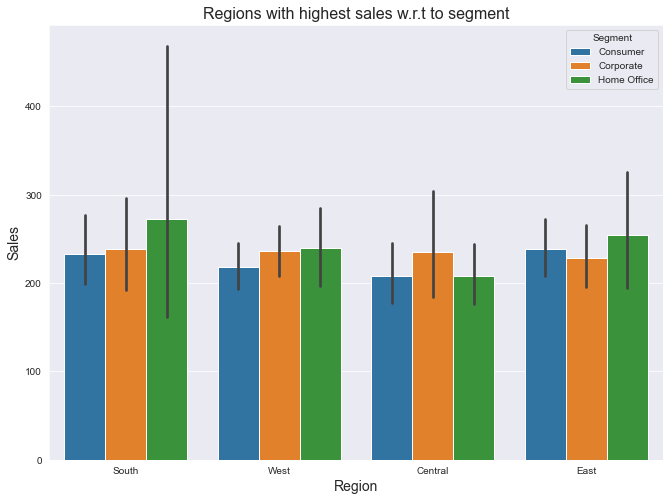

In [15]:
plt.figure(figsize=(11,8))
plt.title("Regions with highest sales w.r.t to segment", size=16)

plt.xlabel('Rgions' , size=14)
plt.ylabel('Sales', size=14)
sns.set_style('darkgrid')

sns.barplot(df['Region'], df['Sales'], hue=df['Segment'] )
plt.show()

# State with most and least sale

In [16]:
df.head(1)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136


In [17]:
df.groupby('State')['Sales'].sum()

State
Alabama                  19510.6400
Arizona                  35282.0010
Arkansas                 11678.1300
California              457576.2715
Colorado                 32108.1180
Connecticut              13384.3570
Delaware                 27451.0690
District of Columbia      2865.0200
Florida                  89473.7080
Georgia                  49095.8400
Idaho                     4382.4860
Illinois                 80162.5370
Indiana                  53555.3600
Iowa                      4579.7600
Kansas                    2914.3100
Kentucky                 36591.7500
Louisiana                 9217.0300
Maine                     1270.5300
Maryland                 23705.5230
Massachusetts            28634.4340
Michigan                 75879.6440
Minnesota                29863.1500
Mississippi              10771.3400
Missouri                 22205.1500
Montana                   5589.3520
Nebraska                  7464.9300
Nevada                   16729.1020
New Hampshire         

In [18]:
df1=df.groupby('State')['Sales'].sum()

In [19]:
states=df.groupby('State')['Sales'].sum().reset_index()
print(states)

                   State        Sales
0                Alabama   19510.6400
1                Arizona   35282.0010
2               Arkansas   11678.1300
3             California  457576.2715
4               Colorado   32108.1180
5            Connecticut   13384.3570
6               Delaware   27451.0690
7   District of Columbia    2865.0200
8                Florida   89473.7080
9                Georgia   49095.8400
10                 Idaho    4382.4860
11              Illinois   80162.5370
12               Indiana   53555.3600
13                  Iowa    4579.7600
14                Kansas    2914.3100
15              Kentucky   36591.7500
16             Louisiana    9217.0300
17                 Maine    1270.5300
18              Maryland   23705.5230
19         Massachusetts   28634.4340
20              Michigan   75879.6440
21             Minnesota   29863.1500
22           Mississippi   10771.3400
23              Missouri   22205.1500
24               Montana    5589.3520
25          

In [20]:
top_5=states.sort_values('Sales',ascending=False).head()
print(top_5)

           State        Sales
3     California  457576.2715
30      New York  310827.1510
41         Texas  170124.5418
45    Washington  138560.8100
36  Pennsylvania  116496.3620


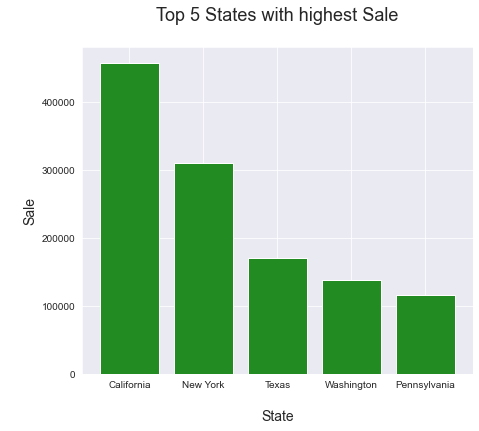

In [21]:
top_5=states.sort_values('Sales',ascending=False).head()
plt.figure(figsize=(7,6))
plt.title('Top 5 States with highest Sale\n',size=18)
plt.bar(top_5['State'],top_5['Sales'],color='forestgreen')
plt.xlabel('\nState',size=14)
plt.ylabel('\nSale',size=14)
plt.show()

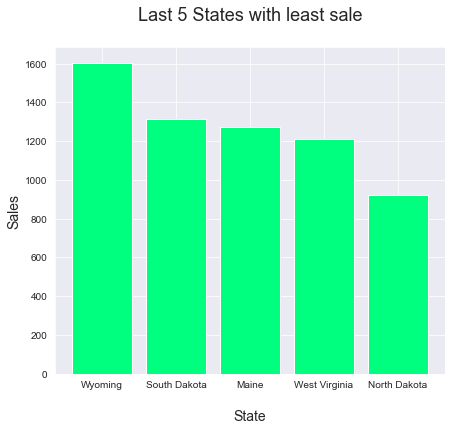

In [22]:
last_5=states.sort_values('Sales',ascending=False).tail()
plt.figure(figsize=(7,6))
plt.title('Last 5 States with least sale\n',size=18)
plt.bar(last_5['State'],last_5['Sales'],color='springgreen')
plt.xlabel('\nState',size=14)
plt.ylabel('Sales',size=14)
plt.show()

## States with most and least Sales

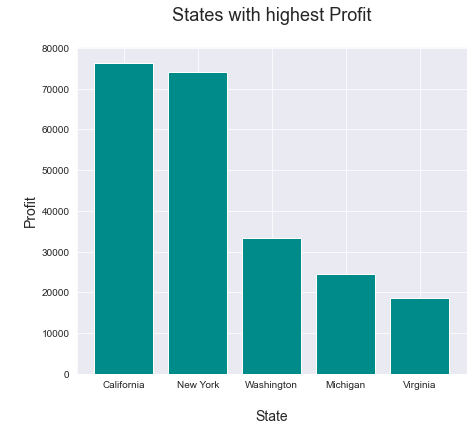

In [28]:
states=df.groupby('State')['Profit'].sum().reset_index()
top_5=states.sort_values('Profit',ascending=False).head()
plt.figure(figsize=(7,6))
plt.title('States with highest Profit\n',size=18)
plt.bar(top_5['State'],top_5['Profit'],color='darkcyan')
plt.xlabel('\nState',size=14)
plt.ylabel('\nProfit',size=14)
plt.show()

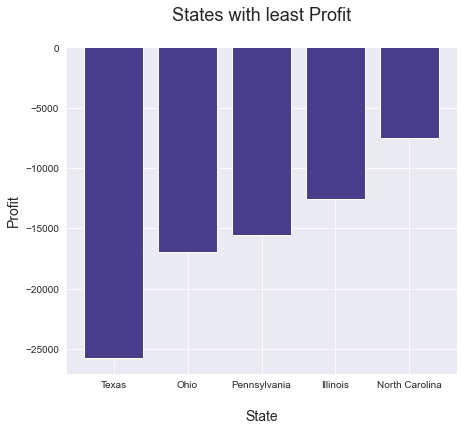

In [29]:
last_5=states.sort_values('Profit',ascending=True).head()
plt.figure(figsize=(7,6))
plt.title('States with least Profit\n',size=18)
plt.bar(last_5['State'],last_5['Profit'],color='darkslateblue')
plt.xlabel('\nState',size=14)
plt.ylabel('Profit',size=14)
plt.show()

## Categories with most Sales, Profits and Discounts

In [23]:
categories=df.groupby('Category')['Sales'].sum().reset_index().sort_values(by='Sales',ascending=False)
categories

,Category,Sales
2,Technology,836154.0330
0,Furniture,741306.3133
1,Office Supplies,718735.2440


In [24]:
categories=df.groupby('Category')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False)
categories

,Category,Profit
2,Technology,145454.9481
1,Office Supplies,122364.6608
0,Furniture,18421.8137


In [25]:
categories=df.groupby('Category')['Discount'].sum().reset_index().sort_values(by='Discount',ascending=False)
categories

,Category,Discount
1,Office Supplies,946.20
0,Furniture,368.59
2,Technology,244.40


# Products with most Sales and Profit

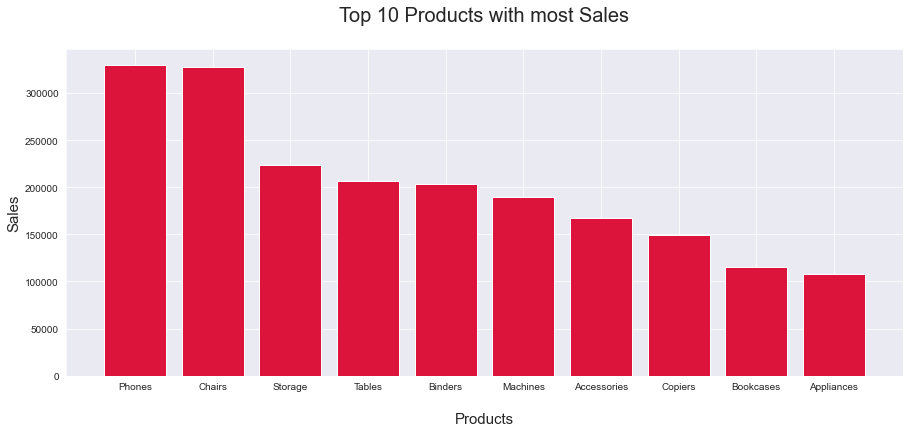

In [26]:
subcategories=df.groupby('Sub-Category')['Sales'].sum().reset_index().sort_values(by='Sales',ascending=False).head(10)
plt.figure(figsize=(15,6))
plt.title('Top 10 Products with most Sales\n',size=20)
plt.bar(subcategories['Sub-Category'],subcategories['Sales'],color='crimson')
plt.xlabel('\nProducts',size=15)
plt.ylabel('Sales',size=15)
plt.show()

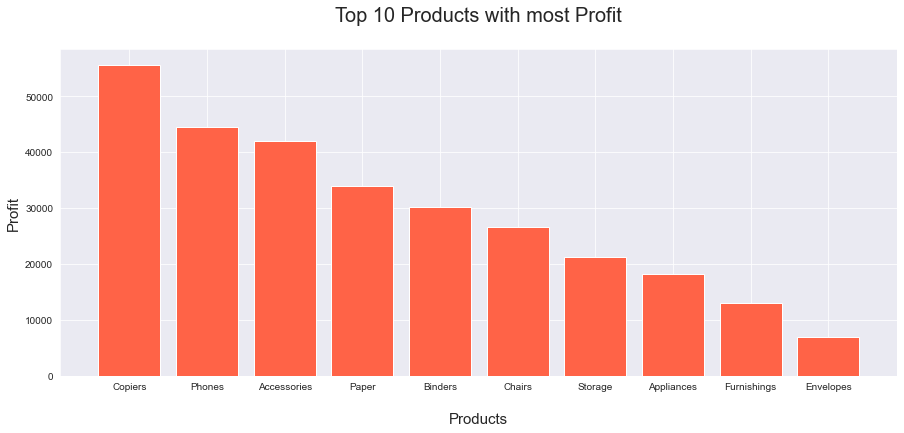

In [27]:
subcategories=df.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False).head(10)
plt.figure(figsize=(15,6))
plt.title('Top 10 Products with most Profit\n',size=20)
plt.bar(subcategories['Sub-Category'],subcategories['Profit'],color='tomato')
plt.xlabel('\nProducts',size=15)
plt.ylabel('Profit',size=15)
plt.show()

# Cities with most and least Profit

In [30]:
cities=df.groupby('City')['Profit'].sum().reset_index()

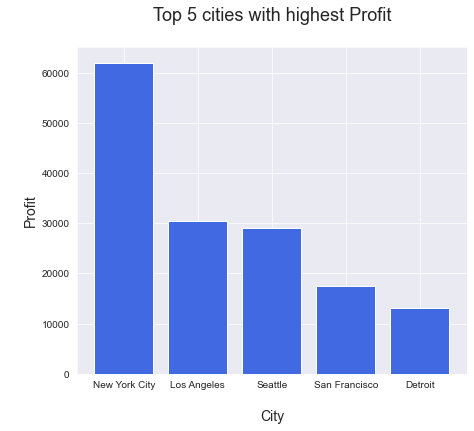

In [31]:
top_5=cities.sort_values('Profit',ascending=False).head()
plt.figure(figsize=(7,6))
plt.title('Top 5 cities with highest Profit\n',size=18)
plt.bar(top_5['City'],top_5['Profit'],color='royalblue')
plt.xlabel('\nCity',size=14)
plt.ylabel('\nProfit',size=14)
plt.show()

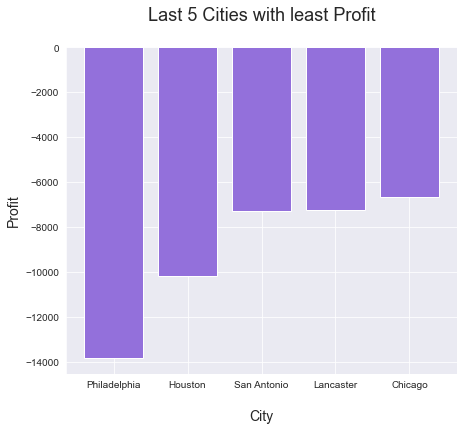

In [32]:
last_5=cities.sort_values('Profit',ascending=True).head()
plt.figure(figsize=(7,6))
plt.title('Last 5 Cities with least Profit\n',size=18)
plt.bar(last_5['City'],last_5['Profit'],color='mediumpurple')
plt.xlabel('\nCity',size=14)
plt.ylabel('Profit',size=14)
plt.show()

# Made By Dipannita Pal